Atom wise Linear Regression formalism for Neural Network Potentials.
which is later refined into element wise then to concatenating Linear Regression.

In [1]:
import os
import glob
import numpy as np

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [266]:
# defining a function to read all the values, energies and sequence of the folders and return them as numpy arrays

def mat(parent_dir):
    lhlH, lhlC, peH, peC, pe_ref, seq = [], [], [], [], [], []
    for foldername in os.listdir(parent_dir):
        if os.path.isdir(os.path.join(parent_dir,foldername)):
            os.chdir(os.path.join(parent_dir, foldername))
            
            llH = np.loadtxt(glob.glob('values.001.out*')[0], usecols=(0))[25:51]
            enH = llH[25]   #pe of H
            llH = llH[:25]

            llC = np.loadtxt(glob.glob('values.006.out*')[0], usecols=(0))[25:51]
            enC = llC[25]   #pe of C
            llC = llC[:25]

            energy = np.loadtxt(glob.glob('energy.out*')[0], usecols=(1))   #pe_ref

            lhlH.append(llH)
            lhlC.append(llC)

            peH.append(enH)
            peC.append(enC)

            pe_ref.append(energy)
            seq.append(foldername)
            

    return np.array(lhlH), np.array(lhlC), np.array(peH), np.array(peC), np.array(pe_ref), seq

        

In [329]:
def corplot(x, y):
    plt.scatter(x, y, color='black', facecolors='none')
    plt.xlabel('true pe')
    plt.ylabel('predicted pe')
    plt.title('Linear Regression')
    plt.show()

In [267]:
#training set

x1, x2, y1, y2, y, seq = mat('/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/Naphthalene/LinearRegression/mulPredict/training-set')

#test set
x1_test, x2_test, y1_test, y2_test, y_test, seq_test = mat('/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/Naphthalene/LinearRegression/mulPredict/test-set--crystal')

In [268]:
########IMPORTANT########

#x2[:,3] #Here look the 4th and 12th neuron value is zero for all the configurations it means that neuron never turned on for the entire training set.
#x2[:,11]

# so x2 is a singular matrix and can't apply analytical solution to find the weights.

#can be fixed


In [269]:
print(x1.shape, x2.shape, y1.shape, y2.shape, y.shape, len(seq))

(11000, 25) (11000, 25) (11000,) (11000,) (11000,) 11000


Analytic solution of Linear regression model

In [270]:
w1 = np.dot(np.linalg.inv(np.dot(x1.T, x1)), np.dot(x1.T, y1)) #analytical solution for linear regression
w1

array([-1.76074661e+03, -1.86658360e+01, -5.20908232e+01,  2.48606579e+01,
       -5.54142486e+00,  1.45639834e+01, -3.11707073e-01, -6.20416530e+00,
       -8.33128021e-03, -2.18963702e+00,  1.47460054e+01, -3.28808567e+01,
        2.52210906e+00,  8.68281864e+01,  4.48268087e-01,  5.87978231e+00,
       -2.37408908e-02, -4.42789714e+00,  1.64805062e+00, -3.87945091e+00,
       -2.93830878e+00, -1.33536787e+00,  1.88289857e-01,  5.43978966e+00,
        2.61413213e-01])

In [271]:
#w2 = np.dot(np.linalg.inv(np.dot(x2.T, x2)), np.dot(x2.T, y2)) # singluar matrix error as two of feature vectors are collinear

Linear Regression models for atomic energy contributions

In [274]:
#Fitting the two separate Linear Regression models for C and H in the training set

model = LinearRegression(fit_intercept=True) #instantiating the model

model.fit(x2, y2) #fitting the model

print(f' Fitted weights :\n {model.coef_}')
print(f'\n Fitted intercept :\n {model.intercept_}')
print(f'\n Rank:\n {model.rank_}')  #see rank is 23 which is less than 25 so it is a singular matrix for C not for H

 Fitted weights :
 [ 6.20707301e-02 -9.00955996e-02 -8.16797106e-03 -8.25595148e-12
  2.48026002e+01 -1.83760329e+00  1.43380472e+01  2.85960273e-03
  3.00037650e-03 -5.72377241e-02  7.49151739e-01  4.72599737e-12
  2.01890190e+00 -1.17883245e-02 -2.88520870e-03 -5.29284453e-01
 -1.99171439e-02  7.30328607e-02  9.75978722e-01  2.36549146e-01
 -3.28269605e-02 -2.72134348e+00 -1.37449924e-02  8.93211770e-04
 -1.59470895e-02]

 Fitted intercept :
 -642.014534550713

 Rank:
 23


Analysis:

with fit_intercept = False - gets the same weight that we get from analytical solution.

In [282]:
#predicting the test set results

y2_pred = model.predict(x2_test)

print(f' Score :\n {model.score(x2_test, y2_test)}')

 Score :
 1.0


In [283]:
print(y2_pred)

[403.03906937 399.2914245  401.40398225 ... 404.17829053 401.14879509
 400.99430792]


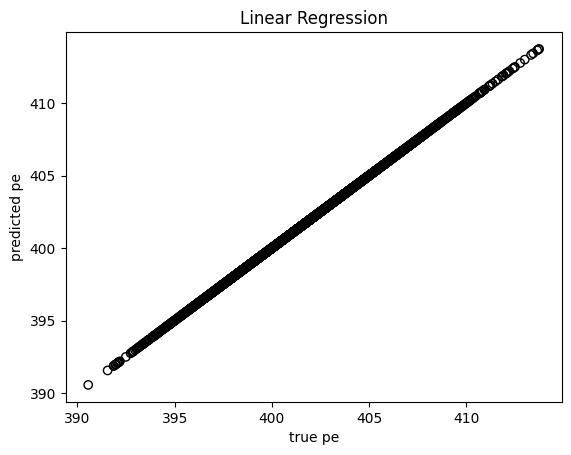

In [330]:
corplot(y2_test, y2_pred)

Text(0.5, 1.0, 'Test set C (eV)')

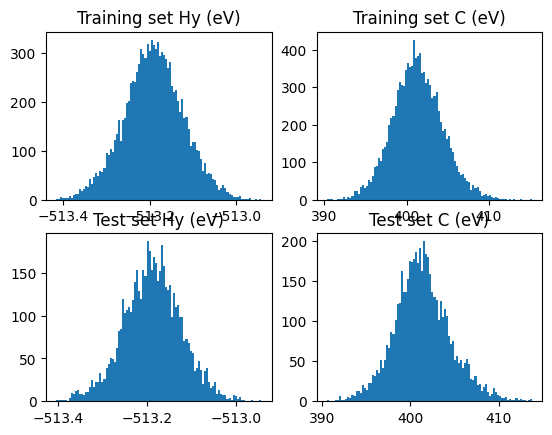

In [355]:
#Atomic energy contribution plots

plt.figure(dpi = 100)
plt.subplot(2, 2, 1)
plt.hist(y1, bins =100)
plt.title('Training set Hy (eV)')
plt.subplot(2, 2, 2)
plt.hist(y2, bins =100)
plt.title('Training set C (eV)')
plt.subplot(2, 2, 3)
plt.hist(y1_test, bins =100)
plt.title('Test set Hy (eV)')
plt.subplot(2, 2, 4)
plt.hist(y2_test, bins =100)
plt.title('Test set C (eV)')

LR model works well for the atomic energy contribution

Linear regression model for the total potential energy of the crsystal by concatenating the atomic features.

In [302]:
x_train = np.concatenate((x1, x2), axis=1)
print(f'feature vector shape:\n {x_train.shape}')


feature vector shape:
 (11000, 50)


In [365]:
model_full = LinearRegression(fit_intercept=True)

model_full.fit(x_train, y)

print(f' Fitted weights :\n {model_full.coef_}')
print(f'\n Fitted intercept :\n {model_full.intercept_}')
print(f'\n Rank:\n {model_full.rank_}')  

 Fitted weights :
 [ 3.78914293e+01 -1.55437955e-02  9.94009814e-01  1.15506411e+00
  3.32013090e-02  4.06848557e-01  6.83045639e-03  1.21512816e-02
  1.09952050e-01 -2.04707095e-01 -3.60356930e-01  1.13862183e+00
 -1.50730240e-02 -3.73836737e-01  1.45742541e-02  1.99951547e-01
  9.10700047e-02  1.47083262e-01  3.30619831e-01  4.35399882e-02
  2.93013862e-02 -1.64185654e-02 -1.23493864e-01 -2.01012308e-01
 -4.42115091e-02  5.19273941e-01 -3.19650992e+00 -1.25288391e+01
 -3.06423552e-06  5.27244931e-01 -1.07819700e+01 -4.31380396e-01
 -1.34670413e+00  1.10402374e+00  1.35420281e+00  5.19592911e-01
 -6.34139186e-09  2.24354530e+01 -2.88084010e-01  6.47286668e-01
 -4.55601202e+04  2.76513302e+00 -9.01867480e-01 -3.32359590e+01
  1.20085870e+01 -1.15291828e+03  1.00737869e+02  2.90258903e-01
  3.50700348e-01  1.07712640e+00]

 Fitted intercept :
 -83974.69937232746

 Rank:
 48


In [344]:
#predicting the test set results
x_test = np.concatenate((x1_test, x2_test), axis=1)
y_pred_full = model_full.predict(x_test)

print(f' Score :\n {model_full.score(x_test, y_test)}')
print(f'\n Predicted energy :\n {y_pred_full}')
print(f'\n True energy :\n {y_test}')

print(f'\n Difference :\n {y_pred_full - y_test}')
print(f'\n Loss :\n {np.sum(np.abs(y_pred_full - y_test)**2)/y_pred_full.shape[0]}')

 Score :
 0.6925337915117418

 Predicted energy :
 [-83930.81013951 -83933.84837952 -83932.6544097  ... -83931.53990092
 -83932.28864294 -83934.18503415]

 True energy :
 [-83931.7246 -83935.6941 -83931.5681 ... -83931.479  -83931.0647
 -83935.8426]

 Difference :
 [ 0.91446049  1.84572048 -1.0863097  ... -0.06090092 -1.22394294
  1.65756585]

 Loss :
 1.3332926549680133


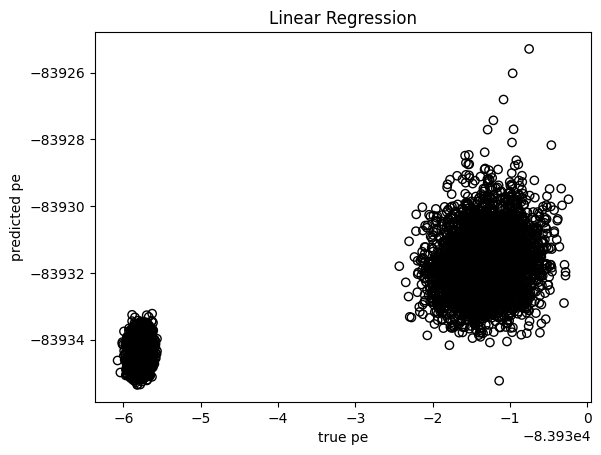

In [331]:
corplot(y_test, y_pred_full)

Text(0.5, 1.0, 'Test set (eV)')

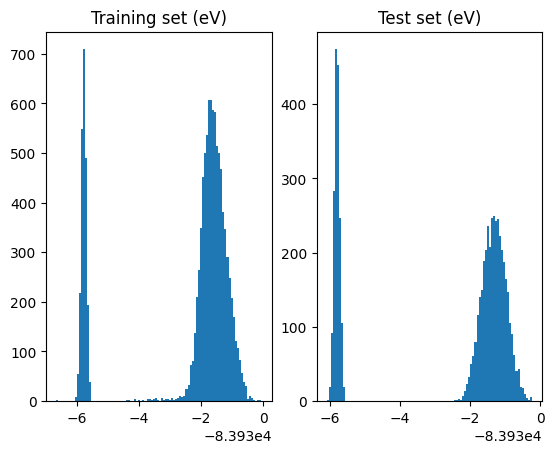

In [348]:
#Total potential energy histogram

plt.figure()
plt.subplot(1, 2, 1)
plt.hist(y, bins =100)
plt.title('Training set (eV)')
plt.subplot(1, 2, 2)
plt.hist(y_test, bins =100)
plt.title('Test set (eV)')

Testing Linear Regression on the molecule

In [357]:
x1_mol, x2_mol, y1_mol, y2_mol, y_mol, seq_mol = mat('/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/Naphthalene/LinearRegression/mulPredict/test-set--molecule')

 Fitted weights :
 [ 6.20707301e-02 -9.00955996e-02 -8.16797106e-03 -8.25595148e-12
  2.48026002e+01 -1.83760329e+00  1.43380472e+01  2.85960273e-03
  3.00037650e-03 -5.72377241e-02  7.49151739e-01  4.72599737e-12
  2.01890190e+00 -1.17883245e-02 -2.88520870e-03 -5.29284453e-01
 -1.99171439e-02  7.30328607e-02  9.75978722e-01  2.36549146e-01
 -3.28269605e-02 -2.72134348e+00 -1.37449924e-02  8.93211770e-04
 -1.59470895e-02]

 Fitted intercept :
 -642.014534550713

 Rank:
 23

 Score :
 0.9999999999999994

 Predicted values :
 [379.79033926 377.37712676 380.32189851 378.80401354 375.23834754
 380.45595114 380.52203204 376.81172571 378.9524921  381.00341426
 382.77530895 381.85894395 382.1379631  380.00967108 380.52640435
 383.23420825 380.63524922 380.46078914 381.90383539 384.68893773]

 True values :
 [379.79033932 377.3771268  380.32189856 378.8040136  375.23834762
 380.45595123 380.52203211 376.81172578 378.95249218 381.00341434
 382.775309   381.85894401 382.13796318 380.00967114 38

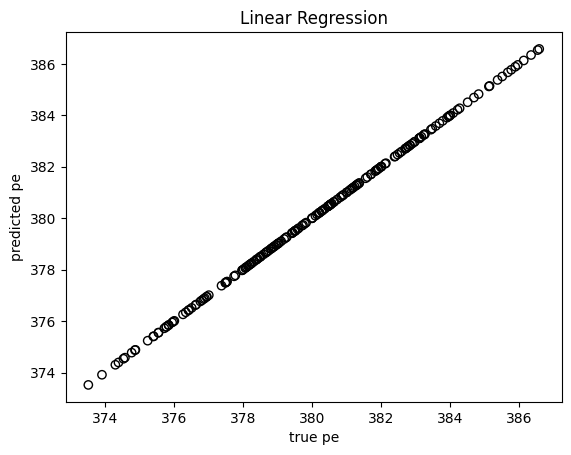

In [362]:
#LR for C in molecule

model = LinearRegression(fit_intercept=True) #instantiating the model

model.fit(x2, y2) #fitting the model

print(f' Fitted weights :\n {model.coef_}')
print(f'\n Fitted intercept :\n {model.intercept_}')
print(f'\n Rank:\n {model.rank_}')  #see rank is 23 which is less than 25 so it is a singular matrix for C not for H

y2_mol_pred = model.predict(x2_mol)

print(f'\n Score :\n {model.score(x2_mol, y2_mol)}')
print(f'\n Predicted values :\n {y2_mol_pred[:20]}')
print(f'\n True values :\n {y2_mol[:20]}')

corplot(y2_mol, y2_mol_pred)

 Fitted weights :
 [ 2.17205825e+00 -7.03524581e-04 -3.57637098e-02 -7.32550118e-06
  4.25101066e-04 -1.55010612e-04 -1.90960112e-05  1.13682668e-03
  2.14328716e-04 -1.49066835e-03  1.33901384e-02  3.60932995e-03
  2.51467342e-04 -1.00263091e-02  1.60595629e-04  1.52684269e-04
  4.41277004e-05 -2.73234023e-04 -5.87926822e-04  1.73714056e-04
 -9.83094533e-05 -1.87819664e-03  1.43083648e-04  4.51973939e-04
 -4.02909596e-04]

 Fitted intercept :
 -513.6116277572838

 Rank:
 25

 Score :
 1.0

 Predicted values :
 [-514.00647194 -513.98265549 -514.00778268 -513.97550034 -513.99414132
 -514.01658584 -514.0100403  -514.00905599 -514.02073387 -514.00110384
 -513.97427335 -513.98588213 -514.03116349 -514.00057234 -514.00296783
 -514.01505917 -514.00923795 -514.00385646 -514.02111373 -513.99138599]

 True values :
 [-514.00647194 -513.98265549 -514.00778268 -513.97550034 -513.99414132
 -514.01658584 -514.0100403  -514.00905599 -514.02073387 -514.00110384
 -513.97427335 -513.98588213 -514.03116

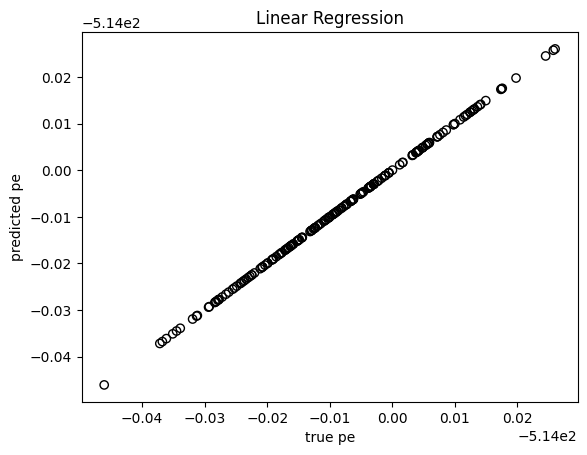

In [363]:
#LR for H in molecule

model = LinearRegression(fit_intercept=True) #instantiating the model

model.fit(x1, y1) #fitting the model

print(f' Fitted weights :\n {model.coef_}')
print(f'\n Fitted intercept :\n {model.intercept_}')
print(f'\n Rank:\n {model.rank_}')  #see rank is 23 which is less than 25 so it is a singular matrix for C not for H

y1_mol_pred = model.predict(x1_mol)

print(f'\n Score :\n {model.score(x1_mol, y1_mol)}')
print(f'\n Predicted values :\n {y1_mol_pred[:20]}')
print(f'\n True values :\n {y1_mol[:20]}')

corplot(y1_mol, y1_mol_pred)

feature vector shape:
 (200, 50)
 Score :
 -939161891841.2899

 Predicted energy :
 [-373314.15261374 -283507.63483123 -388183.25398269 -404116.40127821
 -507090.74681807 -548446.58263564 -475211.646524   -466765.06007391
 -485135.77524977 -514513.06189692 -368745.52577295 -435390.96282404
 -558816.26167714 -414835.59443145 -410631.95957468 -499553.82257767
 -511025.3464054  -365361.5763667  -482681.10436615 -398977.12770634
 -461214.15358429 -554227.73368253 -487985.94314238 -438817.99100766
 -567724.91707374 -541192.50866811 -357565.24017518 -451353.00710133
 -539443.17388542 -510867.42281542 -396947.46261851 -550435.09437162
 -410674.88964848 -451623.80565004 -447551.72627014 -508857.0113633
 -522005.06642052 -517256.32195081 -552773.80834246 -394247.63495627
 -413112.66216468 -533014.91020732 -535135.09833227 -497826.81991733
 -521935.56898658 -321140.38740771 -472632.61587205 -355262.86958922
 -475778.09535115 -466279.62762321 -386642.90119633 -464658.44133176
 -425738.82296712 -5

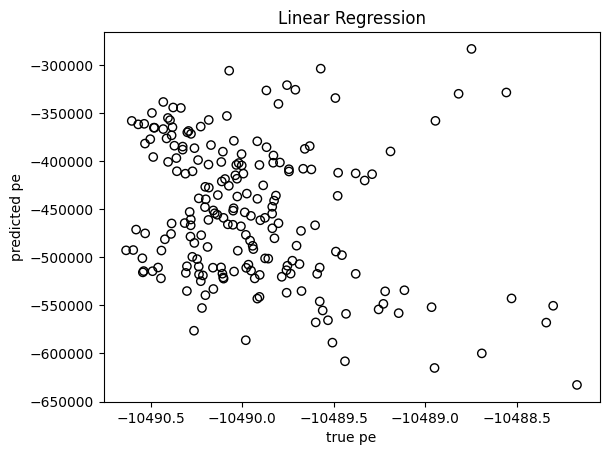

In [366]:
#LR for full molecule

x_mol = np.concatenate((x1_mol, x2_mol), axis=1)
print(f'feature vector shape:\n {x_mol.shape}')

y_pred_mol = model_full.predict(x_mol)

print(f' Score :\n {model_full.score(x_mol, y_mol)}')
print(f'\n Predicted energy :\n {y_pred_mol}')
print(f'\n True energy :\n {y_mol}')

print(f'\n Difference :\n {y_pred_mol - y_mol}')
print(f'\n Loss :\n {np.sum(np.abs(y_pred_mol - y_mol)**2)/y_pred_mol.shape[0]}')

corplot(y_mol, y_pred_mol)

Terible LR for full molecule

In [368]:
#let see the mapping 

new_feature = np.concatenate((y1.reshape(-1, 1), y2.reshape(-1, 1)), axis=1)
print(f'feature vector shape:\n {new_feature.shape}')

feature vector shape:
 (11000, 2)


In [372]:
new_model = LinearRegression(fit_intercept=True) #instantiating the model

new_model.fit(new_feature, y) #fitting the model

print(f' Score :\n {new_model.score(new_feature, y)}')
print(f'\n Fitted weights :\n {new_model.coef_}')
print(f'\n Fitted intercept :\n {new_model.intercept_}')

 Score :
 0.009771984852242288

 Fitted weights :
 [1.35657118 0.04283788]

 Fitted intercept :
 -83253.46098480691


In [382]:
print(np.mean(new_feature, axis=0))

print(np.mean(y)/144)

print(1/np.sqrt((1/143)*np.sum((y - np.mean(y)/144)**2)))

[-513.19062883  401.32012496]
-582.8642284531566
1.367943738872496e-06


Forward pass nnp-predict

In [1370]:
func_data = np.loadtxt('/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/Naphthalene/LinearRegression/test-forwardpass/function.data', usecols = range(0,43))
func_data.shape

(144, 43)

In [1371]:
#Saperating out the C and H symmetry functions

func_data_C =  func_data[np.any(func_data== 6, axis = 1)][:, 1:43]
func_data_H =  func_data[np.any(func_data== 1, axis = 1)][:, 1:43]

print(f' Symmetry function of C: {func_data_C.shape}')
print(f' Symmetry function of H: {func_data_H.shape}')


 Symmetry function of C: (80, 42)
 Symmetry function of H: (64, 42)


In [1372]:
# sigmaf = (np.sqrt((np.sum(func_data_C[:, 1]**2) - np.sum(func_data_C[:, 1])**2 / 80)/79))
# sigmaf  #std is bit different from the one in general

In [1373]:
#Scaling matrix
scale = np.loadtxt('/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/Naphthalene/LinearRegression/test-forwardpass/scaling.data', usecols= (2, 3, 4, 5))
scaleH = scale[0:42, :].T
scaleC = scale[42:, :].T
print(f' Shape of scaling matrix: {scaleH.shape}')
print(scaleH[0])

 Shape of scaling matrix: (4, 42)
[1.04998757e+01 1.37308725e+01 8.05167538e+00 1.06454433e+01
 7.86061088e-01 1.65553190e+00 4.91494305e+00 1.88208800e+01
 9.13336448e+00 1.54141320e+01 5.53794165e+01 3.18301312e+01
 3.64251945e-01 1.50841583e+00 8.66980250e-01 6.59549287e+00
 2.59578705e+01 1.73335984e+01 2.46453212e+00 1.04473777e+01
 4.77336445e+00 7.75308843e+00 3.08417638e+01 1.81646553e+01
 1.75791021e-01 7.74420581e-01 4.44314232e-01 3.36892678e+00
 1.45732292e+01 1.03409457e+01 3.75476544e-03 7.38089477e-02
 5.11082217e-02 1.29154711e-02 3.28803803e-01 5.30298870e-01
 7.45575785e-05 9.53938754e-04 4.98289172e-04 4.71365260e-03
 1.69256101e-01 3.39074881e-01]


In [1374]:
#Making scaled feature vectors

G = 0 + ((1 - 0)* ((func_data_H - scaleH[2]) /scaleH[3]))
print(G[0])
print(G[0].shape)
print(G.shape)

[ 1.71476618 -0.67688032  1.82635769 -0.6405412   2.20182203 -0.46406719
  2.26212922  1.6080959  -0.53383603  1.85593199  1.1694506  -0.78120377
  2.37796867  1.16599187 -0.18422287  1.44614595  1.10073426 -0.79555867
  2.33405057  1.84573713 -0.51915968  1.98437367  1.52989021 -0.75806907
  2.40979851  1.19822631 -0.18261363  1.67811498  1.57905726 -0.77516531
  2.24901667  2.15917466 -0.65758948  2.14363477  2.38163541 -0.78981029
  2.29712076  1.6997227  -0.12088651  2.11821667  2.06773    -0.79810856]
(42,)
(64, 42)


In [1375]:
# #standardizing the data

# func_data = func_data[:,0]
# func_data
# #func_data = func_data - np.mean(func_data)/np.max(func_data)-np.min(func_data)


In [1376]:
# meanff = np.mean(func_data)
# meanff

In [1377]:
# meanf = np.sum(func_data)/func_data.shape[0]
# me

In [1378]:
# stdf = np.sqrt(np.sum(func_data**2) - np.sum(func_data)**2 / func_data.shape[0])/func_data.shape[0] - 1
# stdf

In [1379]:
# print(func_data)
# print(min(func_data))
# print(max(func_data))

# print(np.mean(func_data))
# print(np.std(func_data))

In [1380]:
wH = np.loadtxt('/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/Naphthalene/LinearRegression/test-forwardpass/weights.001.data', usecols = 0)

In [1381]:
w0 = wH[:1050]
#print(w0)
w0 = w0.reshape(42, 25)
print(w0[0])

[-2.58980901  2.45869739 -0.13624238  1.47875005  0.17335106  1.0718353
  6.33713368  3.54431188 -3.93022524 -1.01381679  4.3872747   1.69249479
 -3.94454612  2.51280119 -1.56476644  1.54144455  2.27753064  1.41741063
  0.91675889  1.08477824  0.08884645  3.91735805 -0.39428917  9.46328171
 -0.28705431]


In [1382]:
b0 = wH[1050:1075]
b0

array([-2.32795729,  2.53718443, -1.82942916,  0.74391958, -0.71462099,
        0.77536664,  1.23248122, -2.75036594, -0.0639409 ,  0.02599099,
        0.47303517,  1.02036853,  1.75748541,  2.50153829,  2.8377756 ,
       -3.82935338,  0.39493359, -3.35292887, -3.97061306, -5.37204017,
       -3.44941178,  7.91699917,  2.28898455, -3.86227938, -0.64155807])

In [1383]:
w1 = wH[1075:1700].reshape(25, 25)
w1

array([[ 5.53905010e-04, -2.30299940e-01,  1.11711752e-03,
        -3.72565725e-01,  3.21352811e-01,  1.20970289e-01,
         4.01967838e-02,  4.68467113e-01, -5.40565659e-01,
         2.85852973e-01, -7.21470236e-02,  1.48717435e-01,
         2.54542821e-01,  5.87067703e-02,  7.70656957e-01,
        -1.35311039e-01,  7.73125924e-01, -6.60219530e-01,
         8.73821656e-02, -4.93687158e-01, -4.05250376e-01,
         1.66637771e-01, -3.93672533e-01,  1.42889267e-01,
         8.98181195e-02],
       [ 2.64516245e-03, -3.82767156e-02, -1.46626840e-02,
         6.69449415e-02, -2.70799527e-01, -3.38619472e-01,
         3.87286411e-02,  9.63855169e-02,  5.33984467e-01,
        -1.25357283e-01, -1.04631898e-01, -1.09421429e-03,
        -1.08892462e-01, -2.08737640e-03, -7.08836637e-01,
        -7.28942514e-02, -2.72559917e-01, -1.43053133e-02,
        -3.31944062e-01,  2.65992168e-01, -3.87061929e-02,
         1.37180703e-02, -2.91018526e-02, -8.02744884e-02,
         2.85319496e-01],
    

In [1384]:
b1 = wH[1700:1725]
b1

array([ 0.31761144,  0.62236067, -4.2745117 , -1.49766539, 11.77527309,
       -5.4805477 , -1.8833918 ,  3.24425498, -9.64987875,  3.00075551,
        4.86516781, -1.82699497, -2.61816202, -2.06650013,  7.72449949,
       -2.87696313, -3.84926588, -4.35710718, -1.75949006, -8.67652661,
        7.77103805, -7.67527494,  7.28297332, -0.54262828, -0.71020243])

In [1385]:
w2 = wH[1725:1750]
w2 #last hidden layer

array([ 2.17205825e+00, -7.03524581e-04, -3.57637098e-02, -7.32550118e-06,
        4.25101066e-04, -1.55010612e-04, -1.90960112e-05,  1.13682668e-03,
        2.14328716e-04, -1.49066835e-03,  1.33901384e-02,  3.60932995e-03,
        2.51467342e-04, -1.00263091e-02,  1.60595629e-04,  1.52684269e-04,
        4.41277004e-05, -2.73234023e-04, -5.87926822e-04,  1.73714056e-04,
       -9.83094533e-05, -1.87819664e-03,  1.43083648e-04,  4.51973939e-04,
       -4.02909596e-04])

In [1386]:
b2 = wH[1750:1751]
b2

array([-513.61162776])

In [1387]:
# def softplus(x):
#     return np.where((x == np.nan) | (x == np.inf), x, np.log(1 + np.exp(x)))

# def softplus(x):
#     return np.where((x > 35) | (x < -35), x, np.log1p(np.exp(-np.abs(x))) + np.maximum(x, 0))


#def softplus(x): return np.log1p(np.exp(-np.abs(x))) + np.maximum(x, 0)

def softplus(x): return np.log(1 + np.exp(x))

# import torch.nn as nn
# import torch
# def softplus(x):
#     return nn.functional.softplus(x, threshold=35)

# import warnings

# #suppress warnings
# warnings.filterwarnings('ignore')

In [1388]:
print(f' shapes :\n, 1 atom SF {G[0].shape}\n, w0 {w0.shape}\n, b1 {b1.shape}\n, w1 {w1.shape}\n, b2 {b2.shape}\n, w2 {w2.shape}\n, b3 {b3.shape}\n')

 shapes :
, 1 atom SF (42,)
, w0 (42, 25)
, b1 (25,)
, w1 (25, 25)
, b2 (1,)
, w2 (25,)
, b3 (1,)



In [1389]:
y1 = (w0.T @ G[0]) + b0
y1 = softplus(y1)
print(y1)


[1.42369868e-08 2.11798784e+00 1.09797334e+01 2.10749662e-02
 6.33912355e-01 3.36459740e-01 4.63633931e+00 1.99062426e+01
 1.48450833e+00 3.48474863e-01 6.24957272e-03 4.89429450e-02
 9.28221119e-03 1.24978460e+01 3.19849306e+00 3.90265804e+00
 2.24940325e+01 2.17385573e+00 1.15277827e-01 4.86242135e-01
 1.29913617e-01 4.44912019e+00 2.08556547e+00 1.92391377e+01
 5.11121837e-05]


In [1390]:
y2 = (w1.T @ y1) + b1
print(y2)
y2 = softplus(y2)
print(y2)

[ -1.27086632   1.67984698  -2.33436354 -28.89500097  -4.41600277
   3.03754831   0.43857145   7.34366457 -11.97969243  14.26496932
   5.87442415   1.93511682   2.82311456  -4.97814509   6.66201327
  -6.61144842  -3.25375166   3.4854101   -1.24042029   3.35779569
 -48.1892629   32.50735016   3.86752385 -11.72692315   7.28631105]
[2.47319689e-01 1.85077260e+00 9.24626004e-02 2.82440737e-13
 1.20100222e-02 3.08438639e+00 9.36285762e-01 7.34431104e+00
 6.27024229e-06 1.42649700e+01 5.87723062e+00 2.07000376e+00
 2.88083670e+00 6.86321930e-03 6.66329102e+00 1.34397924e-03
 3.79015866e-02 3.51559122e+00 2.54070441e-01 3.39201537e+00
 0.00000000e+00 3.25073502e+01 3.88821832e+00 8.07346995e-06
 7.28699566e+00]


In [1391]:
y3 = (w2.T @ y2)
print(y3)
y3 = y3 + b2
print(y3)

0.5431181742320671
[-513.06850958]


In [1392]:
output1 = []
for i in range(G.shape[0]):
    y1 = (w0.T @ G[i]) + b0
    y1 = softplus(y1)

    y2 = (w1.T @ y1) + b1
    y2 = softplus(y2)

    y3 = (w2.T @ y2) + b2

    output1.append(y3)

In [1395]:
print(len(output1))

64


In [1426]:
wC = np.loadtxt('/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/Naphthalene/LinearRegression/test-forwardpass/weights.006.data', usecols = 0)
w0 = wC[:1050]
#print(w0)
w0 = w0.reshape(42, 25)

b0 = wC[1050:1075]

w1 = wC[1075:1700].reshape(25, 25)
b1 = wC[1700:1725]

w2 = wC[1725:1750]
b2 = wC[1750:1751]

G2 = 0 + ((1 - 0)* ((func_data_C - scaleC[2]) /scaleC[3]))

output2 = []
ll = []
for i in range(G2.shape[0]):
    y1 = (w0.T @ G2[i]) + b0
    y1 = softplus(y1)

    y2 = (w1.T @ y1) + b1
    y2 = softplus(y2)
    #print(y2)
    ll.append(y2)
    y3 = (w2.T @ y2) + b2

    output2.append(y3)

print(np.array(ll).shape)

(80, 25)


In [1397]:
output2

[array([403.37843385]),
 array([404.04907154]),
 array([398.17759363]),
 array([401.95642671]),
 array([385.72528923]),
 array([387.35803318]),
 array([384.49513736]),
 array([385.23295133]),
 array([466.95588312]),
 array([473.85428853]),
 array([480.46982139]),
 array([473.83155077]),
 array([384.26108054]),
 array([386.76608082]),
 array([384.13010933]),
 array([387.24270829]),
 array([403.61792686]),
 array([397.98527899]),
 array([404.52997682]),
 array([403.04640573]),
 array([407.78798344]),
 array([408.27434199]),
 array([401.54305664]),
 array([409.18732046]),
 array([380.08269191]),
 array([384.78895906]),
 array([379.56063707]),
 array([385.50747612]),
 array([483.39978385]),
 array([472.65023878]),
 array([477.66692034]),
 array([473.05362715]),
 array([383.62794171]),
 array([381.9205266]),
 array([386.00038578]),
 array([388.1474651]),
 array([404.3209363]),
 array([403.65684759]),
 array([396.48711529]),
 array([408.48237254]),
 array([406.81048317]),
 array([404.3633618

In [1400]:
print(len(output1), len(output2))

64 80


In [1404]:
full = np.concatenate((np.array(output2).reshape(80,), np.array(output1).reshape(64,)), axis = 0)
print(full.shape)


(144,)


In [1415]:
newfull = (full / 1.0208770584172682) + (-582.86422845246545)
newfull

#atomic energy contributions are only scaled not shifted by mean energy (this was bugging me... dammm)

array([ -187.734932  ,  -187.07800894,  -192.82941442,  -189.12785893,
        -205.0270677 ,  -203.42771356,  -206.23206282,  -205.50933723,
        -125.45764921,  -118.70031702,  -112.2200726 ,  -118.72258979,
        -206.46133315,  -204.00756042,  -206.58962598,  -203.54068004,
        -187.50033665,  -193.0177962 ,  -186.60693823,  -188.06017011,
        -183.41555824,  -182.93914577,  -189.53277553,  -182.04483783,
        -210.55427323,  -205.9442498 ,  -211.06565198,  -205.2404265 ,
        -109.35002822,  -119.87974381,  -114.96565398,  -119.48460478,
        -207.08152421,  -208.75402248,  -204.7575969 ,  -202.65442562,
        -186.81170384,  -187.46221186,  -194.48532227,  -182.73536948,
        -184.37306851,  -186.77014591,  -191.46911858,  -195.97570943,
        -211.75763932,  -206.89136573,  -207.51399449,  -207.5532358 ,
        -105.13827715,  -106.5851555 ,  -109.9736366 ,  -109.38053532,
        -203.17958491,  -199.93505948,  -202.68750847,  -211.42024748,
      

In [1427]:
tot_energy = np.sum(newfull)
print(tot_energy)

-83930.18101580613


FEATURE MATRIX FOR THE FULL DATASET:

TRAINING SET

In [93]:
func_data = np.loadtxt('/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/Naphthalene/LinearRegression/test-forwardpass/fulldata-feature/function.cleaned.data', usecols = range(0,43))
print(f' Total number of atoms: (number of atoms * number of frames) x (number of symmetry function) \n {func_data.shape}')

func_data_C =  func_data[np.any(func_data== 6, axis = 1)][:, 1:43]  # SF of C
func_data_H =  func_data[np.any(func_data== 1, axis = 1)][:, 1:43]  # SF of H

print(f' Symmetry function of C: ((11000 * 80) * 42) {func_data_C.shape}')
print(f' Symmetry function of H: ((11000 * 64) * 42) {func_data_H.shape}')


 Total number of atoms: (number of atoms * number of frames) x (number of symmetry function) 
 (1584000, 43)
 Symmetry function of C: ((11000 * 80) * 42) (880000, 42)
 Symmetry function of H: ((11000 * 64) * 42) (704000, 42)


In [98]:
#Scaling matrix
scale = np.loadtxt('/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/Naphthalene/LinearRegression/test-forwardpass/fulldata-feature/scaling.data', usecols= (2, 3, 4, 5))
scaleH = scale[0:42, :].T
scaleC = scale[42:, :].T
print(f' Shape of scaling matrix: {scaleH.shape}')

GC = 0 + ((1 - 0)* ((func_data_C - scaleC[2]) /scaleC[3])) #scaled symmetry function of C
GH = 0 + ((1 - 0)* ((func_data_H - scaleH[2]) /scaleH[3])) #scaled symmetry function of H

print(f' Shape of scaled symmetry function of C: {GC.shape}')
print(f' Shape of scaled symmetry function of H: {GH.shape}')

print(GC[0])

 Shape of scaling matrix: (4, 42)
 Shape of scaled symmetry function of C: (880000, 42)
 Shape of scaled symmetry function of H: (704000, 42)
[ 2.16133069  0.06188301  2.14086267 -0.33268874  1.21385452 -0.70120748
  1.93598801  0.88850774 -0.79541857  2.12325896  0.48318627 -0.49077709
  1.42738551  1.52639996 -0.76585904  1.92421164  0.56478141 -0.15878931
  1.82076431  0.95766214 -0.78505519  2.05609231  0.25920429 -0.73398186
  1.3665528   1.32602278 -0.73964563  1.88933202  0.26840123 -0.54058941
  1.10051904  0.66657971 -0.45165636  1.29783856  0.98929498 -0.69416919
  0.98170796  0.72542073 -0.46164747  1.28573828  0.67271438 -0.80274502]


In [8]:
#Softplus activation function
def softplus(x): return np.log(1 + np.exp(x))

In [9]:
#Initial weights for C 

wC = np.loadtxt('/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/Naphthalene/LinearRegression/test-forwardpass/fulldata-feature/weights.006.data', usecols = 0)
w0C = wC[:1050].reshape(42, 25)
b0C = wC[1050:1075]
w1C = wC[1075:1700].reshape(25, 25)
b1C = wC[1700:1725]
w2C = wC[1725:1750]
b2C = wC[1750:1751]

In [10]:
#Initial weights for H

wH = np.loadtxt('/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/Naphthalene/LinearRegression/test-forwardpass/fulldata-feature/weights.001.data', usecols = 0)
w0H = wH[:1050].reshape(42, 25)
b0H = wH[1050:1075]
w1H = wH[1075:1700].reshape(25, 25)
b1H = wH[1700:1725]
w2H = wH[1725:1750]
b2H = wH[1750:1751]

In [11]:
#Forward pass for C

EC = []
llC = []
for i in range(GC.shape[0]):
    y1C = (w0C.T @ GC[i]) + b0C
    y1C = softplus(y1C)

    y2C = (w1C.T @ y1C) + b1C
    y2C = softplus(y2C)
    #print(y2)
    llC.append(y2C)
    y3C = (w2C.T @ y2C) + b2C

    EC.append(y3C)

In [12]:
#Forward pass for H

EH = []
llH = []
for i in range(GH.shape[0]):
    y1H = (w0H.T @ GH[i]) + b0H
    y1H = softplus(y1H)

    y2H = (w1H.T @ y1H) + b1H
    y2H = softplus(y2H)
    #print(y2)
    llH.append(y2H)
    y3H = (w2H.T @ y2H) + b2H

    EH.append(y3H)

In [13]:
print(f' Shape of atomic energy contribution of C: {np.array(EC).shape}')
print(f' Shape of last layer features of C: {np.array(llC).shape}')

print(f' Shape of atomic energy contribution of H: {np.array(EH).shape}')
print(f' Shape of last layer features of H: {np.array(llH).shape}')

 Shape of atomic energy contribution of C: (880000, 1)
 Shape of last layer features of C: (880000, 25)
 Shape of atomic energy contribution of H: (704000, 1)
 Shape of last layer features of H: (704000, 25)


In [21]:
#Atomic energy contributions and reshaping

#These should be from the full training function.data values
conv_energy = 1.0208770584172682
mean_energy = -582.86422845246545

atomic_contributions_C = (np.array(EC) / conv_energy)
atomic_contributions_H = (np.array(EH) / conv_energy)

XC = np.array(llC).reshape(11000, 80, 25)   # 11000 frames, 80 atoms, 25 last layer features
YC = np.array(atomic_contributions_C).reshape(11000, 80, 1) # 11000 frames, 80 atoms, 1 atomic energy contribution

XH = np.array(llH).reshape(11000, 64, 25) # 11000 frames, 64 atoms, 25 last layer features
YH = np.array(atomic_contributions_H).reshape(11000, 64, 1) # 11000 frames, 64 atoms, 1 atomic energy contribution

print(f'first frame atomic contribution of C:\n {YC[0, :, 0]}\n')  #correct
print(f'first frame atomic countribution of H:\n {YH[0, :, 0]}\n')  #correct

print(f'Total energy of first frame: {np.sum(YC[0, :, 0] + mean_energy) + np.sum(YH[0, :, 0] + mean_energy)} eV')  #correct

first frame atomic contribution of C:
 [394.6823138  394.68231467 394.68231434 394.68231442 375.83916853
 375.83916769 375.83916849 375.83916819 474.15639358 474.15639473
 474.15639564 474.15639202 374.91133466 374.91133487 374.91133484
 374.91133487 390.98747534 390.98747674 390.98747656 390.98747538
 394.68231542 394.68231338 394.68231318 394.68231592 375.83916829
 375.83916812 375.8391691  375.83916779 474.15639025 474.15639486
 474.15639454 474.15638999 374.91133536 374.91133492 374.91133495
 374.91133547 390.98747555 390.98747658 390.98747597 390.98747606
 394.68231438 394.682315   394.68231492 394.68231463 375.83916796
 375.839168   375.83916778 375.83916836 474.15639318 474.15639368
 474.1563947  474.1563924  374.91133517 374.91133441 374.91133514
 374.91133467 390.98747508 390.98747657 390.98747571 390.98747564
 394.68231597 394.68231369 394.68231377 394.68231614 375.83916776
 375.83916838 375.83916836 375.83916796 474.15638991 474.15639382
 474.15639361 474.15639035 374.911335

In [34]:
#Linear regression for C1

from sklearn.linear_model import LinearRegression

modelC1 = LinearRegression(fit_intercept=True).fit(XC[:, 0, :], YC[:, 0, 0])

In [35]:
print(f' Fitted weights :\n {modelC1.coef_}')
print(f'\n Fitted intercept :\n {modelC1.intercept_}')
print(f'\n Rank:\n {modelC1.rank_}') 

 Fitted weights :
 [ 6.08013762e-02 -8.82531337e-02 -8.00093507e-03 -4.69244641e-11
  2.42953840e+01 -1.80002409e+00  1.40448324e+01  2.80112351e-03
  2.93901844e-03 -5.60672058e-02  7.33831496e-01  1.01484135e-11
  1.97761511e+00 -1.15472519e-02 -2.82620584e-03 -5.18460456e-01
 -1.95098359e-02  7.15393300e-02  9.56019840e-01  2.31711688e-01
 -3.21556452e-02 -2.66569168e+00 -1.34639056e-02  8.74945482e-04
 -1.56209696e-02]

 Fitted intercept :
 -628.885260235033

 Rank:
 23


In [65]:
#Dictionary of linear regression models

MulRegC = {'modelC'+str(i): LinearRegression(fit_intercept=True).fit(XC[:, x, :], YC[:, x, 0]) for i, x in enumerate(range(XC.shape[1]))}
MulRegH = {'modelC'+str(i): LinearRegression(fit_intercept=True).fit(XH[:, x, :], YH[:, x, 0]) for i, x in enumerate(range(XH.shape[1]))}

TESTING OF LINEAR REGRESSION

In [72]:
func_data_test = np.loadtxt('/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/Naphthalene/LinearRegression/test-forwardpass/fulldata-feature/test/function.data-test', usecols = range(0,43))
print(f' Total number of atoms: (number of atoms * number of frames) x (number of symmetry function) \n {func_data_test.shape}')

func_data_C_test =  func_data_test[np.any(func_data_test== 6, axis = 1)][:, 1:43]  # SF of C
func_data_H_test =  func_data_test[np.any(func_data_test== 1, axis = 1)][:, 1:43]  # SF of H

print(f' Symmetry function of C:  {func_data_C_test.shape}')
print(f' Symmetry function of H:  {func_data_H_test.shape}')


GC_test = 0 + ((1 - 0)* ((func_data_C_test - scaleC[2]) /scaleC[3])) #scaled symmetry function of C
GH_test = 0 + ((1 - 0)* ((func_data_H_test - scaleH[2]) /scaleH[3])) #scaled symmetry function of H

print(f' Shape of scaled symmetry function of C: {GC_test.shape}')
print(f' Shape of scaled symmetry function of H: {GH_test.shape}')


 Total number of atoms: (number of atoms * number of frames) x (number of symmetry function) 
 (144, 43)
 Symmetry function of C:  (80, 42)
 Symmetry function of H:  (64, 42)
 Shape of scaled symmetry function of C: (80, 42)
 Shape of scaled symmetry function of H: (64, 42)


In [73]:

EH_test = []
llH_test = []
for i in range(GH_test.shape[0]):
    y1H_test = (w0H.T @ GH_test[i]) + b0H
    y1H_test = softplus(y1H_test)

    y2H_test = (w1H.T @ y1H_test) + b1H
    y2H_test = softplus(y2H_test)
    #print(y2)
    llH_test.append(y2H_test)
    y3H_test = (w2H.T @ y2H_test) + b2H

    EH_test.append(y3H_test)



In [75]:
EC_test = []
llC_test = []
for i in range(GC_test.shape[0]):
    y1C_test = (w0C.T @ GC_test[i]) + b0C
    y1C_test = softplus(y1C_test)

    y2C_test = (w1C.T @ y1C_test) + b1C
    y2C_test = softplus(y2C_test)
    #print(y2)
    llC_test.append(y2C_test)
    y3C_test = (w2C.T @ y2C_test) + b2C

    EC_test.append(y3C_test)

In [77]:
atomic_contributions_C_test = (np.array(EC_test) / conv_energy)
atomic_contributions_H_test = (np.array(EH_test) / conv_energy)

In [86]:
print(np.array(llC_test)[0])

[8.60245147e+00 1.76314430e+00 5.64545843e-05 0.00000000e+00
 3.33831958e+00 4.48786889e-01 6.48046623e+01 2.72572725e-01
 1.45165247e+00 9.20696392e+00 4.77048242e+01 0.00000000e+00
 8.17713307e-01 2.46350404e+00 2.39864785e+01 3.37960326e-10
 1.39672766e+00 1.40982967e+01 1.03935931e-01 3.26079527e-01
 1.56298100e-06 8.00747710e-03 1.56104250e+00 7.91488560e-01
 2.13775580e-02]


In [89]:
YC0 = MulRegC['modelC0'].predict(np.array(llC_test)[0].reshape(1, -1))
print(YC0, atomic_contributions_C_test[0])


[399.08198551] [399.08198551]


In [92]:
YC_pred = np.array([MulRegC['modelC'+str(i)].predict(np.array(llC_test)[i].reshape(1, -1)) for i in range(len(llC_test))])
YH_pred = np.array([MulRegH['modelC'+str(i)].predict(np.array(llH_test)[i].reshape(1, -1)) for i in range(len(llH_test))])

print(f'Total energy  {np.sum(YC_pred + mean_energy) + np.sum(YH_pred + mean_energy)} eV')  #correct


Total energy  -83935.8320315332 eV
